# Simulate elliptical calibration data - amorphous halo

- simulate an amorphous halo
- fit the elliptical distortions
- compute a polar elliptical transform

This notebook was written and last tested with py4DSTEM v0.12.7 on 2021.09.30

In [1]:
import numpy as np
import py4DSTEM

## Simulated amorphous halo

In [2]:
# set parameters

# dp dims
QNx,QNy = 1024,1024

# ellipse parameters
x0,y0 = 512,512
a,b = 300,250
theta = np.radians(30)

# double sided gaussian params
I0,I1 = 1e3,5e1
sigma0,sigma1,sigma2 = 60,80,100
c_bkgd = 2
R = np.mean((a,b))
A,B,C = py4DSTEM.process.utils.convert_ellipse_params_r(a,b,theta)
#B,C = B/A,C/A
#p = (I0,I1,sigma0,sigma1,sigma2,c_bkgd,x0,y0,R,B,C)
p = (I0,I1,sigma0,sigma1,sigma2,c_bkgd,x0,y0,A,B,C)

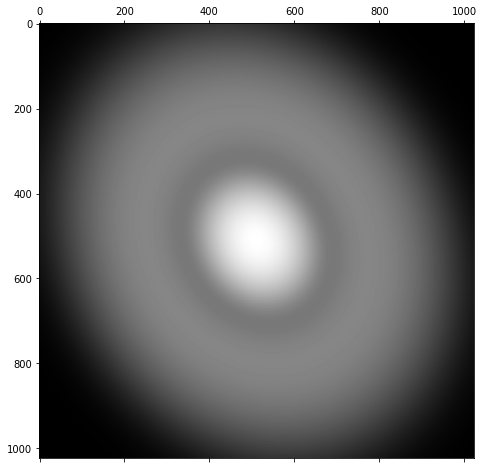

In [3]:
# generate pattern
yy,xx = np.meshgrid(np.arange(QNy),np.arange(QNx))
_dp = py4DSTEM.process.calibration.double_sided_gaussian(p,xx,yy)
py4DSTEM.visualize.show(_dp,scaling='log')

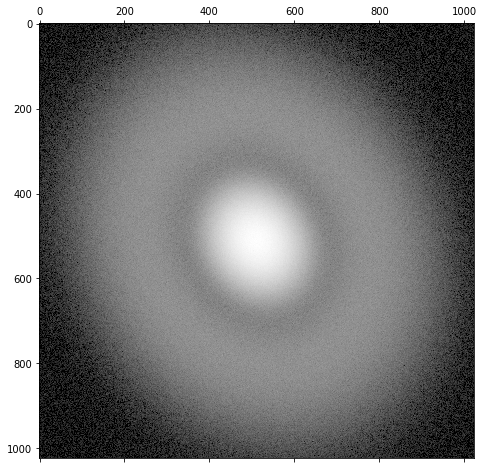

In [4]:
# add poisson noise
dp = np.random.poisson(_dp,(QNx,QNy))
py4DSTEM.visualize.show(dp,scaling='log')

## Fit and transform

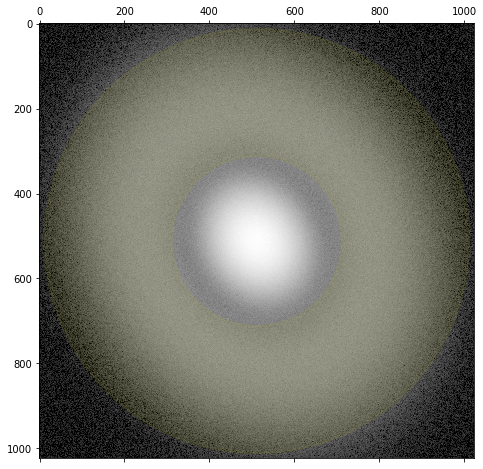

In [5]:
# Select fitting region
center = (512,512)
fitradii = 200,500
py4DSTEM.visualize.show(
                dp,
                annulus={'center':center,'Ri':fitradii[0],'Ro':fitradii[1],'fill':True,'color':'y','alpha':0.08},
                scaling='log')

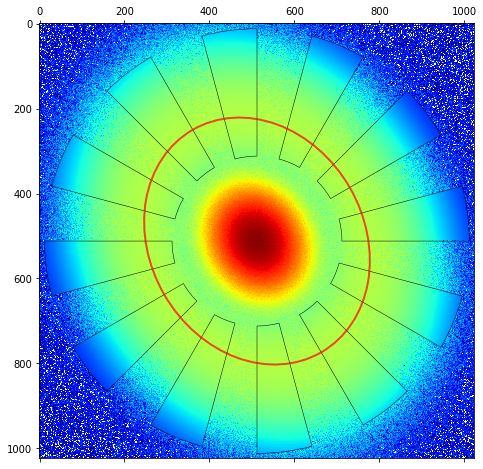

In [6]:
# Perform fit and show results
ellipse_params,dsg_params = py4DSTEM.process.calibration.fit_ellipse_amorphous_ring(
                                    dp,center,fitradii)
py4DSTEM.visualize.show_amorphous_ring_fit(dp,fitradii,dsg_params,ellipse=True,cmap='jet')

/opt/anaconda3/envs/py4dstem_dev/lib/python3.8/site-packages/numpy-1.19.0-py3.8-macosx-10.9-x86_64.egg/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


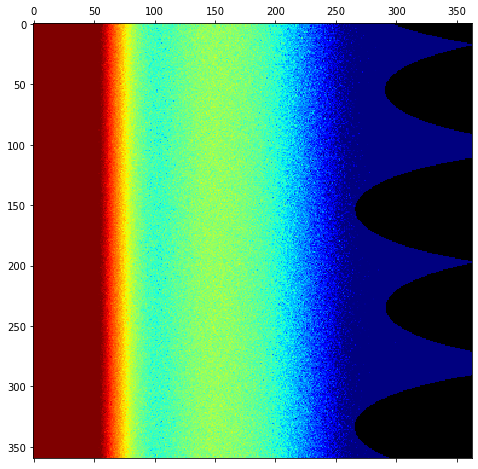

In [7]:
dp_pe,rr_dp,pp_dp = py4DSTEM.process.utils.cartesian_to_polarelliptical_transform(
                                dp,
                                ellipse_params,
                                dr=2,
                                dphi=np.radians(1))
py4DSTEM.visualize.show(dp_pe,scaling='log',clipvals='std',min=-1,max=1,cmap='jet')

In [8]:
# compare to sim params

# unpack params
x0_fit,y0_fit,a_fit,b_fit,theta_fit = ellipse_params

# handle theta degeneracy
theta = np.mod(theta,np.pi)
theta_fit = np.mod(theta_fit,np.pi)

print("x0, x0_fit = {:.2f}, {:.2f}".format(center[0],x0_fit))
print("y0, y0_fit = {:.2f}, {:.2f}".format(center[1],y0_fit))
print("a, a_fit = {:.2f}, {:.2f}".format(a,a_fit))
print("b, b_fit = {:.5f}, {:.5f}".format(b,b_fit))
print("theta, theta_fit = {:.5f}, {:.5f}".format(theta,theta_fit))
print("")
print("x0 err = {:.3f}%".format(100*(center[0]-x0_fit)/center[0]))
print("y0 err = {:.3f}%".format(100*(center[1]-y0_fit)/center[1]))
print("a err = {:.3f}%".format(100*(a-a_fit)/a))
print("b err = {:.5f}%".format(100*(b-b_fit)/b))
print("theta err = {:.5f}%".format(100*(theta-theta_fit)/theta))

x0, x0_fit = 512.00, 511.95
y0, y0_fit = 512.00, 512.03
a, a_fit = 300.00, 302.54
b, b_fit = 250.00000, 252.18624
theta, theta_fit = 0.52360, 0.52414

x0 err = 0.010%
y0 err = -0.006%
a err = -0.846%
b err = -0.87450%
theta err = -0.10323%
